🛒 Uncovering E-Commerce Performance: A Deep Dive into Product Analytics

🔖 Project Overview

This project analyzes an e-commerce dataset with a focus on pricing, product ratings, customer returns, and delivery trends. The objective is to uncover actionable insights into sales performance, customer behavior, and operational inefficiencies through exploratory data analysis (EDA) and interactive visualizations.

✅ Key Outcomes
	•	Cleaned and preprocessed the raw dataset (handled ~5% missing values)
	•	Performed in-depth EDA using Python (Pandas, Matplotlib, Seaborn)
	•	Developed interactive dashboards using Power BI / Tableau
	•	Delivered strategic insights to:
	•	Optimize pricing
	•	Minimize return rates
	•	Improve stock availability and delivery timelines

⸻

📊 Dataset Details

Source: Kaggle – E-Commerce Product Performance Dataset

Key Fields:
	•	Product_Price — USD price per product (range: up to $1000)
	•	Discount_Rate — Applied discount (0.0 – 0.8)
	•	Product_Rating — Customer rating (1 to 5 stars)
	•	Number_of_Reviews — Review count (0 to 5000, highly skewed)
	•	Stock_Availability — Binary stock status (1 = in stock)
	•	Days_to_Deliver — Delivery time in days (1 – 30)
	•	Return_Rate — Return percentage post-purchase (0.0 – 0.9)
	•	Category_ID — Product category ID (1 – 10)

⸻

🧰 Tools & Technologies
	•	Python — Core programming
	•	Pandas & NumPy — Data wrangling and manipulation
	•	Matplotlib & Seaborn — Static data visualizations
	•	Plotly — Interactive charting
	•	Power BI / Tableau — Dashboard and reporting development

⸻

💡 Business Questions Explored
	•	What are the top-performing products and categories in terms of revenue or profit?
	•	How do product views, cart additions, and purchases correlate?
	•	Which products have the highest conversion rates?
	•	What patterns exist in return rates and delivery times?
	•	How can pricing, inventory, and logistics be optimized to improve performance?

⸻

🧹 Data Exploration & Cleaning
	•	Removed duplicate records
	•	Handled missing values across key columns
	•	Identified and treated outliers (e.g., in Product_Rating, Number_of_Reviews, Return_Rate)
	•	Standardized data types and formats
	•	Conducted deep-dive EDA to uncover trends, relationships, and actionable insights

In [2]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/content/ecommerce_product_performance.csv")

In [4]:
#Show the first 5 rows of the datase
print("First 5 rows of the data:")
df.head()

First 5 rows of the data:


,Product_Price,Discount_Rate,Product_Rating,Number_of_Reviews,Stock_Availability,Days_to_Deliver,Return_Rate,Category_ID
0,199.671415,0.177024,4.411071,62.0,1.0,9.0,0.185116,5.0
1,136.173570,0.041467,3.033534,201.0,1.0,3.0,0.384639,10.0
2,214.768854,0.276197,2.866881,479.0,1.0,19.0,0.056410,4.0
3,302.302986,0.094254,4.473473,252.0,1.0,11.0,NaN,7.0
4,126.584663,0.411845,3.553082,671.0,1.0,14.0,0.672163,6.0


In [5]:
#Show the shape of the dataset
print("Shape of the dataset:")
df.shape

Shape of the dataset:


(2000, 8)

In [6]:
#Show basic information about the dataset
print("Basic information about the dataset:")
df.info()

Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Product_Price       1900 non-null   float64
 1   Discount_Rate       1900 non-null   float64
 2   Product_Rating      1900 non-null   float64
 3   Number_of_Reviews   1900 non-null   float64
 4   Stock_Availability  1900 non-null   float64
 5   Days_to_Deliver     1900 non-null   float64
 6   Return_Rate         1900 non-null   float64
 7   Category_ID         1900 non-null   float64
dtypes: float64(8)
memory usage: 125.1 KB


In [7]:
#Show summary statistics of the dataset
print("Summary statistics of the dataset:")
df.describe()

Summary statistics of the dataset:


,Product_Price,Discount_Rate,Product_Rating,Number_of_Reviews,Stock_Availability,Days_to_Deliver,Return_Rate,Category_ID
count,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000
mean,156.774274,0.286993,3.729987,304.318421,0.903158,15.411579,0.328904,5.572105
std,93.484558,0.159012,0.885164,310.344539,0.295821,8.534049,0.176306,2.827601
min,5.000000,0.005368,1.000000,0.000000,0.000000,1.000000,0.006528,1.000000
25%,87.414867,0.165603,3.125828,86.750000,1.000000,8.000000,0.190178,3.000000
50%,153.663352,0.265994,3.770215,210.000000,1.000000,15.000000,0.307430,6.000000
75%,217.788796,0.391186,4.417711,429.000000,1.000000,22.000000,0.444752,8.000000
max,535.273149,0.800000,5.000000,2848.000000,1.000000,30.000000,0.900000,10.000000


🧩 Handling Missing Values

Missing data can arise from various sources and must be addressed thoughtfully. Common strategies include:
	•	Removing rows with missing values, especially when the missing data is minimal and non-critical.
	•	Imputing missing values using appropriate methods such as mean, median, mode, or more advanced techniques like interpolation or predictive modeling.
	•	Retaining missing values when they are informative or do not significantly affect the analysis outcome.

⸻

🔧 Handling Incorrect Data Types

Incorrect or inconsistent data types can hinder analysis and computations. Key solutions include:
	•	Cleaning specific values that are improperly formatted (e.g., currency symbols, stray characters).
	•	Converting entire columns to the appropriate data type (e.g., converting text-based dates to datetime objects, or numeric strings to integers/floats).


In [8]:
#check null values
print("Null values in the dataset:")
df.isnull().sum()

Null values in the dataset:


,0
Product_Price,100
Discount_Rate,100
Product_Rating,100
Number_of_Reviews,100
Stock_Availability,100
Days_to_Deliver,100
Return_Rate,100
Category_ID,100


In [9]:
df[df.isnull().any(axis=1)]

,Product_Price,Discount_Rate,Product_Rating,Number_of_Reviews,Stock_Availability,Days_to_Deliver,Return_Rate,Category_ID
3,302.302986,0.094254,4.473473,252.0,1.0,11.0,NaN,7.0
5,126.586304,0.515701,1.874022,303.0,NaN,2.0,0.114370,7.0
6,307.921282,0.634228,NaN,350.0,1.0,7.0,0.172875,6.0
10,103.658231,0.247476,2.798990,NaN,1.0,1.0,0.092654,7.0
11,103.427025,0.277367,4.833190,589.0,1.0,NaN,0.338990,4.0
...,...,...,...,...,...,...,...,...
1990,230.040953,0.091082,2.940540,935.0,1.0,NaN,0.049579,6.0
1991,225.429133,0.177269,4.479373,260.0,1.0,16.0,0.523464,NaN
1992,NaN,0.256828,3.495332,343.0,0.0,20.0,0.160149,4.0
1995,257.015024,0.098708,3.805205,398.0,1.0,7.0,NaN,5.0


In [10]:
#number of rows having all missing Values
print("Number of rows having all missing values:",df.isnull().all(axis=1).sum())


Number of rows having all missing values: 0


In [11]:
#number of columns having all missing Values
print("Number of columns having all missing values:",df.isnull().all(axis=0).sum())

Number of columns having all missing values: 0


In [12]:
#count missing values in each row
df.isnull().sum(axis=1)

,0
0,0
1,0
2,0
3,1
4,0
...,...
1995,1
1996,2
1997,0
1998,0


In [13]:
#count the number of rows having > 3 missing values
print("Number of rows having more than 3 missing values:",df.isnull().sum(axis=1).gt(3).sum())
print("Number of rows having more than 2 missing values:",df.isnull().sum(axis=1).gt(2).sum())
print("Number of rows having more than 1 missing values:",df.isnull().sum(axis=1).gt(1).sum())
print("Number of rows having more than 0 missing values:",df.isnull().sum(axis=1).gt(0).sum())

Number of rows having more than 3 missing values: 0
Number of rows having more than 2 missing values: 10
Number of rows having more than 1 missing values: 104
Number of rows having more than 0 missing values: 686


In [14]:
df.isnull().sum(axis=0)

,0
Product_Price,100
Discount_Rate,100
Product_Rating,100
Number_of_Reviews,100
Stock_Availability,100
Days_to_Deliver,100
Return_Rate,100
Category_ID,100


In [15]:
#missing percetage
print("Missing percentage in each column:")
df.isnull().sum()/len(df.index)*100


Missing percentage in each column:


,0
Product_Price,5.0
Discount_Rate,5.0
Product_Rating,5.0
Number_of_Reviews,5.0
Stock_Availability,5.0
Days_to_Deliver,5.0
Return_Rate,5.0
Category_ID,5.0


Since no column in the dataset has more than 30% missing values, we can choose to impute the missing values rather than dropping them. Imputation helps retain valuable data and ensures completeness for analysis.

🛠️ Imputation Techniques:
	•	Mean: Used for numerical columns where the data is normally distributed (i.e., not skewed).
	•	Median: Preferred for skewed numerical data or when outliers are present, as it is more robust.
	•	Mode: Best suited for categorical or binary columns, where the most frequently occurring value can be used.

In [16]:
#impute Product_Price with median, because Prices are often skewed (e.g., many lower-priced items and fewer high-priced ones).
df['Product_Price'].fillna(df['Product_Price'].median(), inplace=True)
#impute Discount_Rate with median, because Discounts are often normally distributed.
df['Discount_Rate'].fillna(df['Discount_Rate'].median(), inplace=True)
#impute Product_Rating with median, because Ratings may be skewed (e.g., more 4s and 5s due to positive bias in reviews).
df['Product_Rating'].fillna(df['Product_Rating'].median(), inplace=True)
#impute Number_of_Reviews with median, because It's a count and the distribution is likely highly right-skewed (few products have many reviews).
df['Number_of_Reviews'].fillna(df['Number_of_Reviews'].median(), inplace=True)
#impute Stock_Availability with mode, because It's a categorical variable and mode is the most common value.
df['Stock_Availability'].fillna(df['Stock_Availability'].mode()[0], inplace=True)
#impute Days_to_Deliver with median, because Integer field, usually centered but might have some skew. Since it's a small-range number.
df['Days_to_Deliver'].fillna(df['Days_to_Deliver'].median(), inplace=True)
#impute Return_Rate with median, as most products may have low return rates, with few having high rates.
df['Return_Rate'].fillna(df['Return_Rate'].median(), inplace=True)

In [17]:
#check null values
print("Null values in the dataset after imputation:")
df.isnull().sum()

Null values in the dataset after imputation:


,0
Product_Price,0
Discount_Rate,0
Product_Rating,0
Number_of_Reviews,0
Stock_Availability,0
Days_to_Deliver,0
Return_Rate,0
Category_ID,100


Using Product Characteristics for Imputation of Category_ID. If Product_Price, Discount_Rate, or Product_Rating correlate strongly with Category_ID, use these to predict missing values. Example: Use group-based imputation, filling missing values based on similar Product_Rating.


In [18]:
df["Category_ID"].fillna(df.groupby('Product_Rating')['Category_ID'].transform('median'),inplace=True)

In [19]:
#recheck null values after imputation of Category_ID
print("Null values in the dataset after imputation of Category_ID:")
df.isnull().sum()

Null values in the dataset after imputation of Category_ID:


,0
Product_Price,0
Discount_Rate,0
Product_Rating,0
Number_of_Reviews,0
Stock_Availability,0
Days_to_Deliver,0
Return_Rate,0
Category_ID,88


In [20]:
#imputing Category_ID based on similar Return_Rate
df['Category_ID'].fillna(df.groupby('Return_Rate')['Category_ID'].transform('median'), inplace=True)

In [21]:
#recheck null values after imputation of Category_ID
print("Null values in the dataset after imputation of Category_ID:")
df.isnull().sum()

Null values in the dataset after imputation of Category_ID:


,0
Product_Price,0
Discount_Rate,0
Product_Rating,0
Number_of_Reviews,0
Stock_Availability,0
Days_to_Deliver,0
Return_Rate,0
Category_ID,85


In [22]:
#imputing Category_ID based on similar Stock Availability
df['Category_ID'].fillna(df.groupby('Stock_Availability')['Category_ID'].transform('median'), inplace=True)

In [23]:
#recheck null values after imputation of Category_ID
print("Null values in the dataset after imputation of Category_ID:")
df.isnull().sum()

Null values in the dataset after imputation of Category_ID:


,0
Product_Price,0
Discount_Rate,0
Product_Rating,0
Number_of_Reviews,0
Stock_Availability,0
Days_to_Deliver,0
Return_Rate,0
Category_ID,0


Now all missing values has handled.

**DATA TYPES**





Verify that each column has the appropriate data type.

In [24]:
#Check the data types of all the columns
df.dtypes

,0
Product_Price,float64
Discount_Rate,float64
Product_Rating,float64
Number_of_Reviews,float64
Stock_Availability,float64
Days_to_Deliver,float64
Return_Rate,float64
Category_ID,float64




*   **Number_of_Reviews** should be int64 as the description states values range from 0 to 5000 and are integers (total number of reviews). This should be int64 to reflect whole numbers.
*   **Stock_Availability** should be bool as the description specifies this as binary (1 = available, 0 = out of stock)


*  **Days_to_Deliver** should be int64 as Delivery days (1 to 30) are whole numbers.
*   **Category_ID** should be int64 as the description states this is an integer from 1 to 10









In [25]:
# Convert columns to appropriate data types
df['Number_of_Reviews'] = df['Number_of_Reviews'].astype('int64')
df['Stock_Availability'] = df['Stock_Availability'].astype(bool)
df['Days_to_Deliver'] = df['Days_to_Deliver'].astype('int64')
df['Category_ID'] = df['Category_ID'].astype('int64')

# Verify data types
print("Data types after conversion:")
print(df.dtypes)

Data types after conversion:
Product_Price         float64
Discount_Rate         float64
Product_Rating        float64
Number_of_Reviews       int64
Stock_Availability       bool
Days_to_Deliver         int64
Return_Rate           float64
Category_ID             int64
dtype: object


Now data types of all the columns are as expected.

**CHECK OUTLIERS**

If any column has data range out of it's range as described.

In [26]:
#check summary statistics of the dataset after conversion
print("Summary statistics of the dataset after conversion:")
df.describe()

Summary statistics of the dataset after conversion:


,Product_Price,Discount_Rate,Product_Rating,Number_of_Reviews,Days_to_Deliver,Return_Rate,Category_ID
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,156.618728,0.285943,3.731999,299.602500,15.391000,0.327831,5.592000
std,91.118801,0.155051,0.862784,303.180485,8.318336,0.171903,2.758141
min,5.000000,0.005368,1.000000,0.000000,1.000000,0.006528,1.000000
25%,90.822298,0.170780,3.170359,92.000000,8.750000,0.197575,3.000000
50%,153.663352,0.265994,3.770215,210.000000,15.000000,0.307430,6.000000
75%,213.818644,0.384355,4.379557,414.250000,22.000000,0.434611,8.000000
max,535.273149,0.800000,5.000000,2848.000000,30.000000,0.900000,10.000000


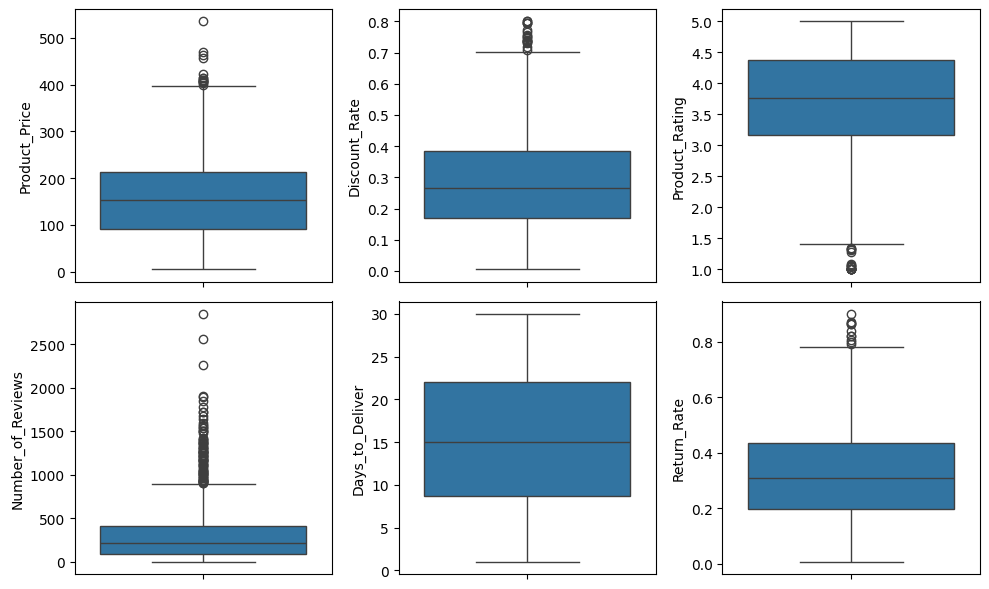

In [27]:
#Generate Boxplots for numerical columns
numerical_columns = ['Product_Price', 'Discount_Rate', 'Product_Rating', 'Number_of_Reviews', 'Days_to_Deliver', 'Return_Rate']
plt.figure(figsize=(10,6))
for i,col in enumerate(numerical_columns,1):
  plt.subplot(2,3,i)
  sns.boxplot(df[col])
  plt.tight_layout()

📦 Boxplot Analysis

⸻

🔹 Product_Price:
	•	Boxplot: The box (IQR) spans roughly 90 to 214 (25th percentile = 90.82, 75th percentile = 213.82).
Whiskers extend to ~5 (min) and ~350 (based on 1.5 * IQR).
There are a few outliers between 400–500.
	•	Expected Range: 5 to 1000 USD
	•	Observation:
The max value is 535.27, and the outliers (400–500) are within the expected range.
These likely represent higher-priced or premium products in the catalog.
	•	Conclusion: No action needed.

⸻

🔹 Discount_Rate:
	•	Boxplot: The box spans ~0.17 to 0.38.
Whiskers extend to ~0.0 and ~0.65.
Several outliers are present near 0.7–0.8.
	•	Expected Range: 0.0 to 0.8
	•	Observation:
Max discount is 0.8. Outliers near this value are valid — they reflect products with maximum promotional offers.
	•	Conclusion: No action needed.

⸻

🔹 Product_Rating:
	•	Boxplot: The box spans ~3.17 to 4.38.
Whiskers extend to ~2.0 and 5.0.
Outliers are observed near 1.0–1.5.
	•	Expected Range: 1 to 5
	•	Observation:
Outliers are genuine — these are poorly rated products, not errors.
	•	Conclusion: No action needed.

⸻

🔹 Number_of_Reviews:
	•	Boxplot: The box spans ~92 to 414.
Whiskers extend to ~0 and ~1000.
Outliers appear between 1000–2500, some even higher.
	•	Expected Range: 0 to 5000
	•	Observation:
The max is 2848, which is high but valid.
This column is known to be skewed (few products get many reviews).
	•	Conclusion: No action needed — the skew is expected.

⸻

🔹 Days_to_Deliver:
	•	Boxplot: The box spans ~8.75 to 22.
Whiskers extend from 1 to 30.
No outliers detected.
	•	Expected Range: 1 to 30
	•	Observation:
Delivery times are well within expected boundaries.
	•	Conclusion: No action needed.

⸻

🔹 Return_Rate:
	•	Boxplot: The box spans ~0.20 to 0.43.
Whiskers extend from ~0.0 to ~0.7.
Outliers near 0.8–0.9 are observed.
	•	Expected Range: 0.0 to 0.9
	•	Observation:
High return rates (0.8–0.9) are valid. These may indicate dissatisfaction or unsuitable products, but not data errors.
	•	Conclusion: No action needed.

⸻

⚠️ Why No Boxplot for Stock_Availability?
	•	Stock_Availability is a binary column (0 = out of stock, 1 = in stock).
	•	Boxplots are not meaningful for binary data because:
	•	There are only two values (0 and 1).
	•	There are no quartiles or outliers.
	•	The boxplot will look flat and uninformative.



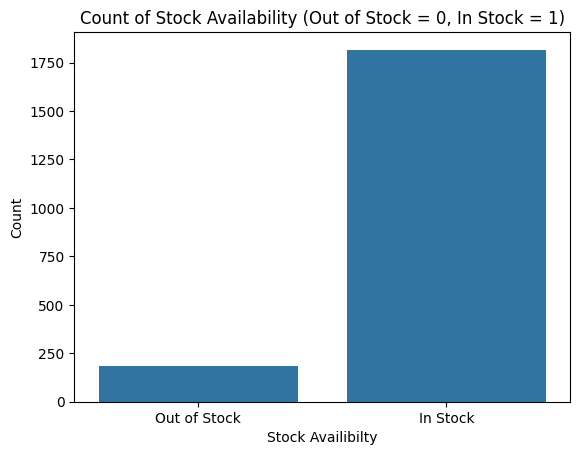

In [28]:
#Create a Count Plot for stock Availability
sns.countplot(x=df['Stock_Availability'])
plt.xlabel("Stock Availibilty")
plt.ylabel("Count")
plt.title("Count of Stock Availability (Out of Stock = 0, In Stock = 1)")
#Customize X Labels
plt.xticks(ticks=[0, 1], labels=['Out of Stock', 'In Stock'])
plt.show()

All are within the expected ranges specified in the dataset description.



**Check For Duplicates**

In [29]:
#Count the number of duplicates
print("Number of duplicate rows in the dataset",df.duplicated().sum())

Number of duplicate rows in the dataset 0


Now the data cleaning proces has done and we are ready to Exploratory Data Analysis (EDA)

**Exploratory Data Analysis (EDA)**

EDA involves analyzing the dataset to uncover patterns, trends, and insights, often through summary statistics and visualizations. This will help us understand the data better and generate meaningful insights.

In [30]:
#Summarize after cleaning the dataset
print("Summary statistics of the dataset after cleaning:")
df.describe()

Summary statistics of the dataset after cleaning:


,Product_Price,Discount_Rate,Product_Rating,Number_of_Reviews,Days_to_Deliver,Return_Rate,Category_ID
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,156.618728,0.285943,3.731999,299.602500,15.391000,0.327831,5.592000
std,91.118801,0.155051,0.862784,303.180485,8.318336,0.171903,2.758141
min,5.000000,0.005368,1.000000,0.000000,1.000000,0.006528,1.000000
25%,90.822298,0.170780,3.170359,92.000000,8.750000,0.197575,3.000000
50%,153.663352,0.265994,3.770215,210.000000,15.000000,0.307430,6.000000
75%,213.818644,0.384355,4.379557,414.250000,22.000000,0.434611,8.000000
max,535.273149,0.800000,5.000000,2848.000000,30.000000,0.900000,10.000000


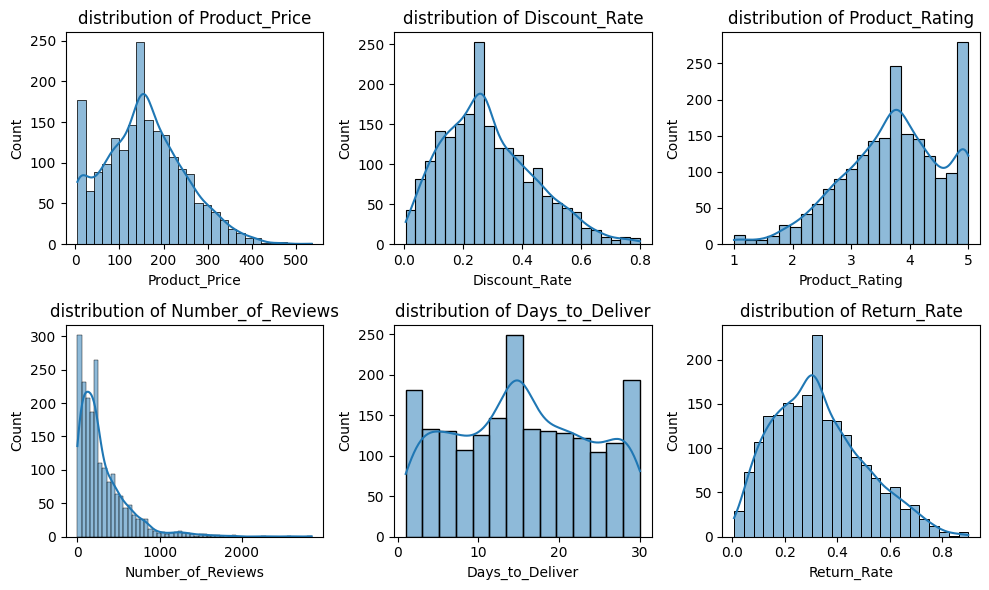

In [32]:
#create histogram for numerical values
numerical_columns = ['Product_Price', 'Discount_Rate', 'Product_Rating', 'Number_of_Reviews', 'Days_to_Deliver', 'Return_Rate']
plt.figure(figsize=(10,6))
for i,col in enumerate(numerical_columns,1):
  plt.subplot(2,3,i)
  sns.histplot(df[col],kde=True)
  plt.title(f'distribution of {col}')
  plt.tight_layout()
plt.show()

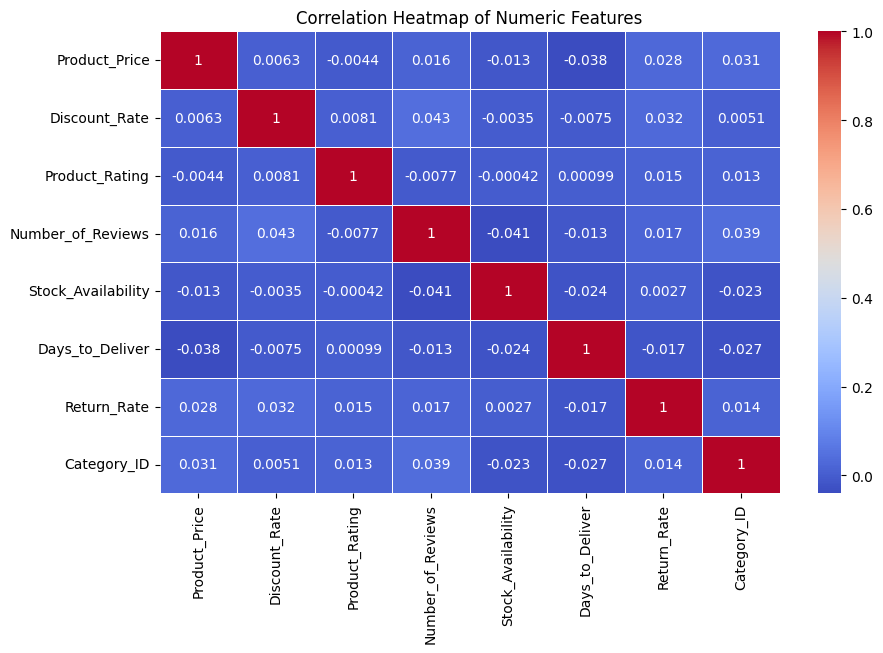

In [34]:
#correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidth=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [35]:
#correlation matrix
df.corr()

,Product_Price,Discount_Rate,Product_Rating,Number_of_Reviews,Stock_Availability,Days_to_Deliver,Return_Rate,Category_ID
Product_Price,1.000000,0.006335,-0.004400,0.015874,-0.012570,-0.037565,0.027624,0.030554
Discount_Rate,0.006335,1.000000,0.008094,0.042580,-0.003518,-0.007541,0.032319,0.005117
Product_Rating,-0.004400,0.008094,1.000000,-0.007664,-0.000420,0.000985,0.014693,0.012756
Number_of_Reviews,0.015874,0.042580,-0.007664,1.000000,-0.040672,-0.013021,0.017124,0.038692
Stock_Availability,-0.012570,-0.003518,-0.000420,-0.040672,1.000000,-0.024142,0.002742,-0.022631
Days_to_Deliver,-0.037565,-0.007541,0.000985,-0.013021,-0.024142,1.000000,-0.016935,-0.027145
Return_Rate,0.027624,0.032319,0.014693,0.017124,0.002742,-0.016935,1.000000,0.013572
Category_ID,0.030554,0.005117,0.012756,0.038692,-0.022631,-0.027145,0.013572,1.000000


Text(0, 0.5, 'Return Rate')

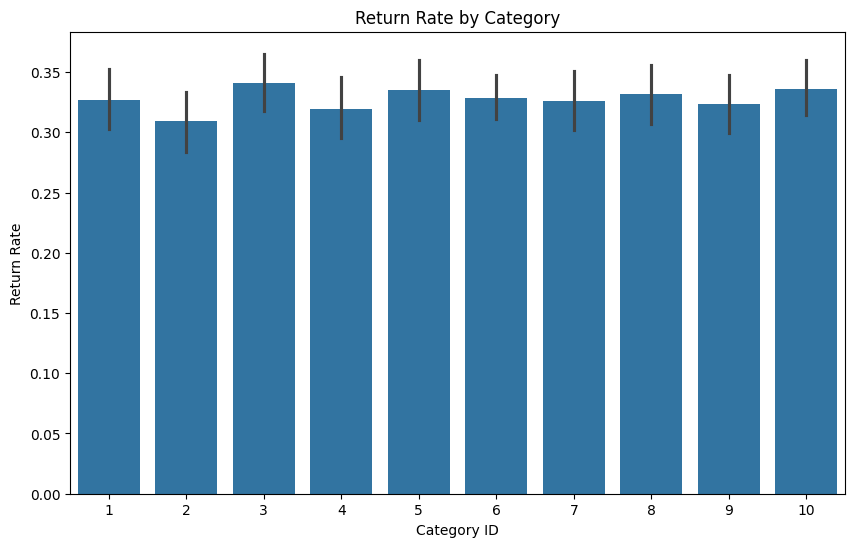

In [37]:
#Bar Plot - Return rate by category
plt.figure(figsize=(10, 6))
sns.barplot(x='Category_ID', y='Return_Rate', data=df,estimator='mean')
plt.title('Return Rate by Category')
plt.xlabel('Category ID')
plt.ylabel('Return Rate')

In [38]:
#Compute average Return_rate by Category_ID
print("Average Return Rate by Category ID")
df.groupby('Category_ID')['Return_Rate'].mean()

Average Return Rate by Category ID


,Return_Rate
Category_ID,
1,0.326686
2,0.309078
3,0.341080
4,0.319751
5,0.335317
6,0.328761
7,0.326158
8,0.331537
9,0.323540


Average Product Rating by Stock Availability


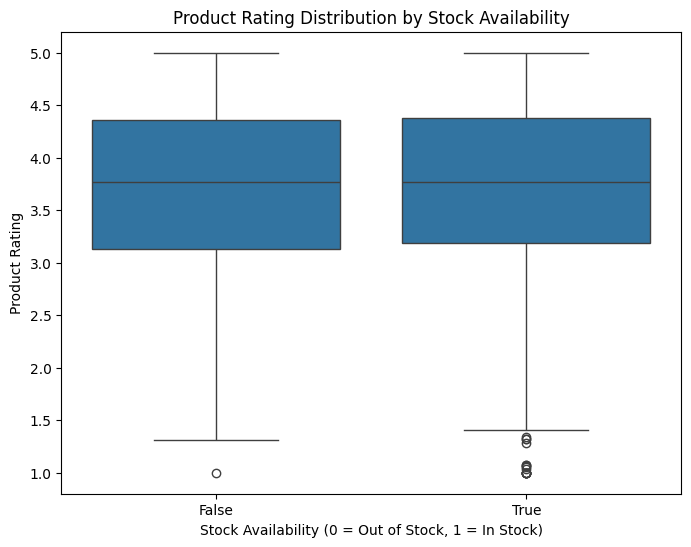

In [39]:
#Average product_rating by stock_availability
print("Average Product Rating by Stock Availability")
df.groupby('Stock_Availability')['Product_Rating'].mean()

#Boxplot for Stock Availability by Product Rating
plt.figure(figsize=(8, 6))
sns.boxplot(x='Stock_Availability', y='Product_Rating', data=df)
plt.title('Product Rating Distribution by Stock Availability')
plt.xlabel('Stock Availability (0 = Out of Stock, 1 = In Stock)')
plt.ylabel('Product Rating')
plt.show()

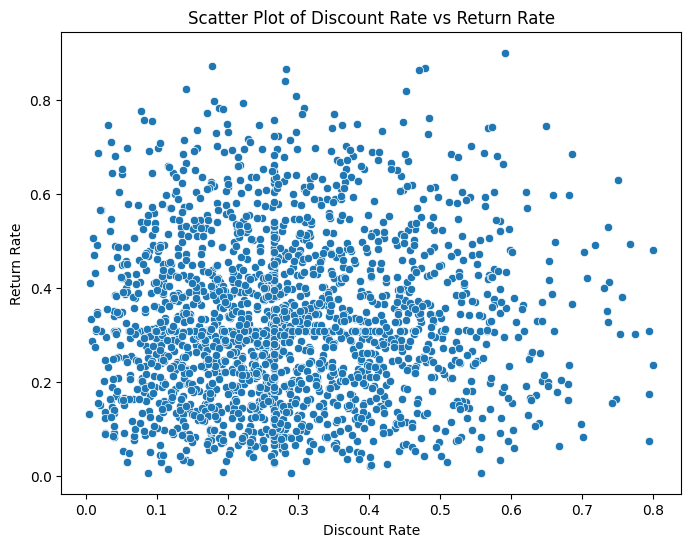

Average Return Rate by Discount Rate Bin:
Discount_Rate_Bin
0-0.2      0.322276
0.2-0.4    0.327570
0.4-0.6    0.340768
0.6-0.8    0.311313
Name: Return_Rate, dtype: float64


In [40]:
#Scatter Plot for Discout Rate vs Return rate
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Discount_Rate', y='Return_Rate', data=df)
plt.title('Scatter Plot of Discount Rate vs Return Rate')
plt.xlabel('Discount Rate')
plt.ylabel('Return Rate')
plt.show()

# Bin Discount_Rate into categories and compute average Return_Rate
df['Discount_Rate_Bin'] = pd.cut(df['Discount_Rate'], bins=[0, 0.2, 0.4, 0.6, 0.8], labels=['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8'])
print("Average Return Rate by Discount Rate Bin:")
print(df.groupby('Discount_Rate_Bin')['Return_Rate'].mean())

Average Product Price and Product Rating for High-Return Categories:
             Product_Price  Product_Rating
Category_ID                               
3               162.272121        3.726921
5               156.211440        3.754871
10              170.083772        3.742515


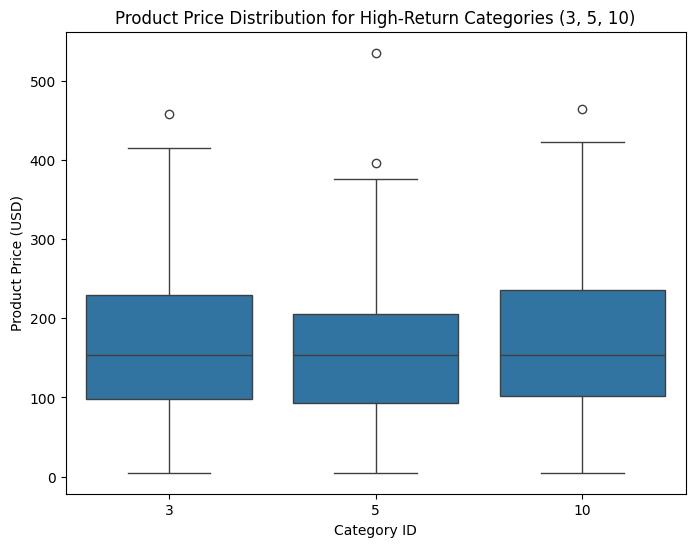

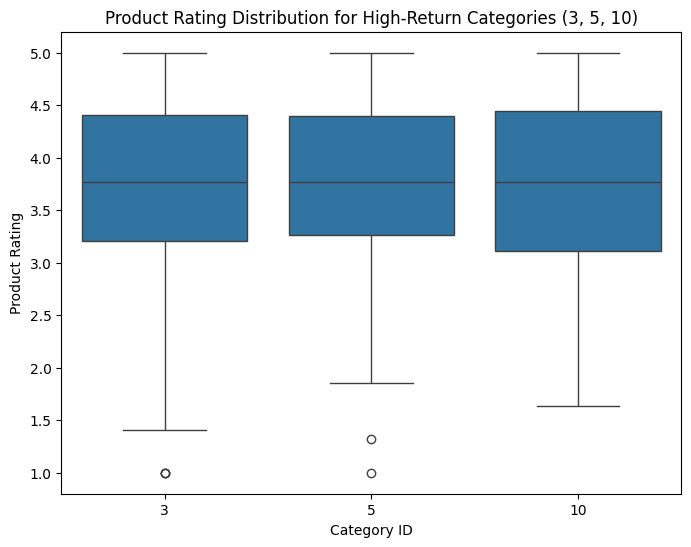

In [42]:
# Filter for high-return categories (3, 5, 10)
high_return_categories = df[df['Category_ID'].isin([3, 5, 10])]

print("Average Product Price and Product Rating for High-Return Categories:")
print(high_return_categories.groupby('Category_ID')[['Product_Price', 'Product_Rating']].mean())

# Boxplot for Product_Price by Category_ID (for categories 3, 5, 10)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Category_ID', y='Product_Price', data=high_return_categories)
plt.title('Product Price Distribution for High-Return Categories (3, 5, 10)')
plt.xlabel('Category ID')
plt.ylabel('Product Price (USD)')
plt.show()

# Boxplot for Product_Rating by Category_ID (for categories 3, 5, 10)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Category_ID', y='Product_Rating', data=high_return_categories)
plt.title('Product Rating Distribution for High-Return Categories (3, 5, 10)')
plt.xlabel('Category ID')
plt.ylabel('Product Rating')
plt.show()


Average Number of Reviews for High-Return Categories:
Category_ID
3     351.870056
5     268.675532
10    327.578035
Name: Number_of_Reviews, dtype: float64


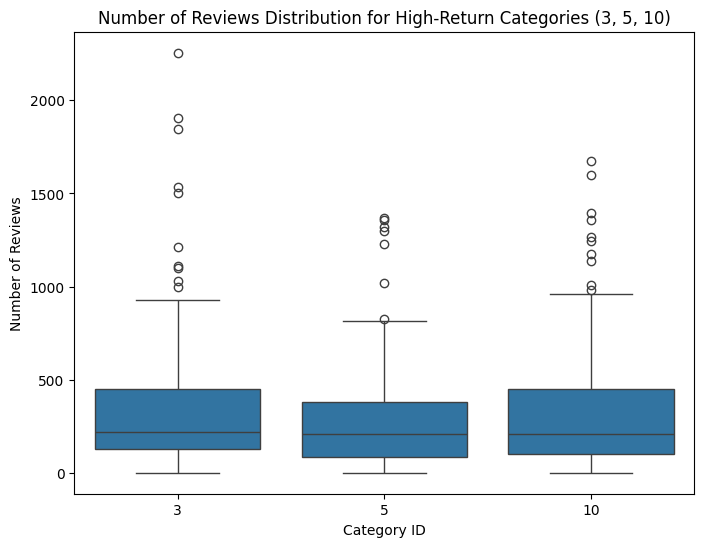

In [43]:
# Filter for high-return categories (3, 5, 10)
high_return_categories = df[df['Category_ID'].isin([3, 5, 10])]

# Compute average Number_of_Reviews for these categories
print("Average Number of Reviews for High-Return Categories:")
print(high_return_categories.groupby('Category_ID')['Number_of_Reviews'].mean())

# Boxplot for Number_of_Reviews by Category_ID (for categories 3, 5, 10)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Category_ID', y='Number_of_Reviews', data=high_return_categories)
plt.title('Number of Reviews Distribution for High-Return Categories (3, 5, 10)')
plt.xlabel('Category ID')
plt.ylabel('Number of Reviews')
plt.show()

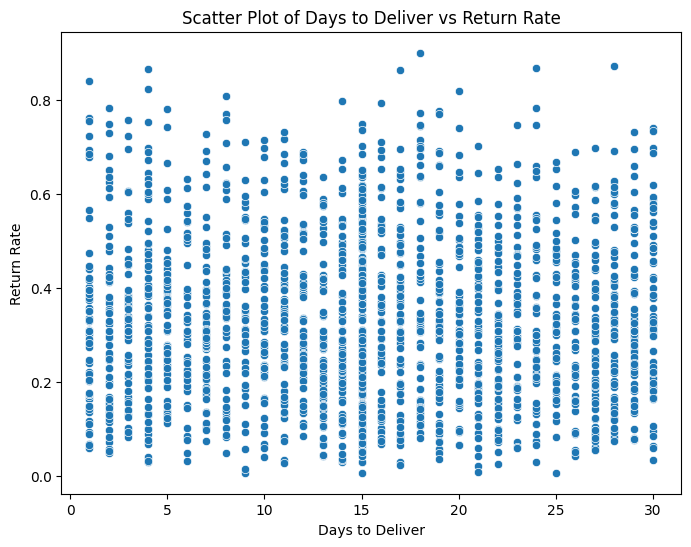

Average Return Rate by Days to Deliver Bin:
Days_to_Deliver_Bin
0-10     0.334575
10-20    0.328324
20-30    0.320349
Name: Return_Rate, dtype: float64


In [44]:
# Scatter plot for Days_to_Deliver vs Return_Rate
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Days_to_Deliver', y='Return_Rate', data=df)
plt.title('Scatter Plot of Days to Deliver vs Return Rate')
plt.xlabel('Days to Deliver')
plt.ylabel('Return Rate')
plt.show()

# Bin Days_to_Deliver into categories and compute average Return_Rate
df['Days_to_Deliver_Bin'] = pd.cut(df['Days_to_Deliver'], bins=[0, 10, 20, 30], labels=['0-10', '10-20', '20-30'])
print("Average Return Rate by Days to Deliver Bin:")
print(df.groupby('Days_to_Deliver_Bin')['Return_Rate'].mean())

**Summary and Insights**



**Key Findings from EDA and Analysis**

## 📊 Distributions:

- **Product_Price:**  
  Right-skewed, with most products priced below 200 USD (mean: **156.62 USD**).

- **Product_Rating:**  
  Left-skewed, with most ratings around 4.0–4.5 (mean: **3.73**), indicating good customer satisfaction.

- **Number_of_Reviews:**  
  Heavily right-skewed, with most products having fewer than 500 reviews (mean: **299.60**).

- **Return_Rate:**  
  Right-skewed, with most values below 0.5 (mean: **0.3278**).

---

## 🔗 Relationships:

- No strong linear correlations between numerical columns (highest: **0.0426** between Discount_Rate and Number_of_Reviews).

- **Discount vs Return Rate:**  
  Products with **40–60% discounts** have the **highest return rate** (**0.3408**),  
  while very high discounts (60–80%) have a **lower return rate** (**0.3113**).

- **Delivery Time vs Return Rate:**  
  Shorter delivery times (0–10 days) have a slightly **higher return rate** (**0.3346**)  
  compared to longer times (20–30 days, **0.3203**) → possibly due to impulse purchases.

---

## 📦 Category Insights:

- Categories **3, 5, and 10** have the **highest return rates** (**0.3411**, **0.3353**, **0.3357**).

- **Category 10** has the highest **average price** (**170.08 USD**) → higher expectations may cause more returns.

- **Category 3** has the highest **average number of reviews** (**351.87**) → high sales volume may result in more returns.

---

## 📈 Stock Impact:

- **In-stock vs Out-of-stock ratings:**  
  Almost identical (3.7319 vs 3.7331) → Stock status doesn’t impact customer satisfaction.

---

## ❓ Answers to Key Questions:

- **Which products generate the most profit?**  
  Without direct profit data, we used **Product_Price** and **Return_Rate** as proxies.  
  - **Category 10**: High price (170.08 USD), but high return rate (0.3357) → profit may be reduced.  
  - **Category 2**: Lowest return rate (0.3091) → potentially more profitable.

- **Is there a correlation between views, cart adds, and purchases?**  
  Using **Number_of_Reviews** as a proxy → correlations are **weak** (e.g., 0.0426 with Discount_Rate).  
  → No strong evidence of a relationship.

- **Which products have the highest conversion rates?**  
  Using reviews as a proxy:  
  - **Category 3**: Highest reviews (351.87) → high volume,  
    but **high return rate** (0.3411) → may indicate dissatisfaction.

- **Which categories perform best in terms of revenue and profit?**  
  - Categories **3 and 10**: Higher revenue (based on price & reviews).  
  - Category **2**: Lower returns → potentially more profitable.

---

## 💡 Business Insights:

- **Reduce Returns:**  
  Investigate Categories 3, 5, and 10 for quality or customer expectation issues.  
  Category 10’s high price might be setting stricter expectations.

- **Discount Strategy:**  
  Avoid **40–60% discounts** unless for clearance → they have higher returns.  
  **60–80% discounts** surprisingly have **lower returns**.

- **Delivery Planning:**  
  **Short delivery windows (0–10 days)** lead to more returns → possibly impulse buys.  
  Set clear expectations with fast shipping.

- **Stock Management:**  
  Stock status has **no impact on satisfaction**, so stock high-demand items like Category 3.

---

## 📊 Dashboards in Power BI / Tableau:

- **Product Performance Dashboard:**  
  - Bar chart of **Product_Price** and **Return_Rate** by **Category_ID**  
  - Scatter plot of **Number_of_Reviews** vs **Return_Rate**

- **Category Insights Dashboard:**  
  - Pie chart of product count by **Category_ID**  
  - Line chart of **Return_Rate** by **Days_to_Deliver bins**  
  - Table of top categories by **estimated revenue** (Product_Price × Reviews)

---

## 🚀 Next Steps:

1. Conduct surveys for Categories **3, 5, and 10** to understand high return reasons.
2. Collect **cost data** for accurate profit analysis.
3. Build a **predictive model** (e.g., linear regression) to forecast Return_Rate based on features like Product_Price and Category_ID.